In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import seaborn
import glob
import os
import urllib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
#from matplotlib.finance import candlestick_ohlc
from matplotlib import style
import datetime as dt
from dateutil import parser
%matplotlib inline

In [2]:
style.use('fivethirtyeight')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [3]:
print(plt.__file__)

C:\Users\Mark\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\pyplot.py


In [5]:
path_1 = r'C:\Users\Mark\Desktop\Bootcamp\Project One\project_one_forked\Marks_Files\Stock Prices'
all_files_aapl = glob.glob(os.path.join(path_1, 'aapl.csv'))

df_from_each_file_aapl = (pd.read_csv(f) for f in all_files_aapl)

concatenated_df_aapl = pd.concat(df_from_each_file_aapl, ignore_index=True)
concatenated_df_aapl.head()

,Company,Date,Open,High,Low,Close,Volume,Adj Close
0,AAPL,29-Dec-17,170.520004,170.589996,169.220001,169.229996,25999900,169.229996
1,AAPL,28-Dec-17,171.000000,171.850006,170.479996,171.080002,16480200,171.080002
2,AAPL,27-Dec-17,170.100006,170.779999,169.710007,170.600006,21498200,170.600006
3,AAPL,26-Dec-17,170.800003,171.470001,169.679993,170.570007,33185500,170.570007
4,AAPL,22-Dec-17,174.679993,175.419998,174.500000,175.009995,16349400,175.009995


In [6]:
concatenated_df_aapl['Date'] = pd.to_datetime(concatenated_df_aapl['Date'])
concatenated_df_aapl = concatenated_df_aapl.sort_values(by='Date')

In [8]:
smc_aapl = concatenated_df_aapl[(concatenated_df_aapl['Date'] > '2008-03-16') & (concatenated_df_aapl['Date'] < '2009-05-01')]
smc_aapl.head(10)

,Company,Date,Open,High,Low,Close,Volume,Adj Close
2466,AAPL,2008-03-17,17.507143,18.370001,17.507143,18.104286,268149700,16.229288
2465,AAPL,2008-03-18,18.454287,19.000000,18.381428,18.974285,301280000,17.009180
2464,AAPL,2008-03-19,19.017143,19.184286,18.524286,18.524286,252634200,16.605791
2463,AAPL,2008-03-20,18.731428,19.041430,18.454287,19.038572,227196900,17.066809
2462,AAPL,2008-03-24,19.144285,20.121429,19.091429,19.932858,266730100,17.868479
2461,AAPL,2008-03-25,19.994286,20.442858,19.618572,20.139999,263097800,18.054167
2460,AAPL,2008-03-26,20.124287,20.820000,20.091429,20.722857,295521100,18.576662
2459,AAPL,2008-03-27,20.707144,20.758572,19.998571,20.035715,249957400,17.960686
2458,AAPL,2008-03-28,20.257143,20.664286,20.228571,20.430000,178652600,18.314135
2457,AAPL,2008-03-31,20.467142,20.815714,20.360001,20.500000,192016300,18.376886


In [17]:
MA1 = 10
MA2 = 30
MA3 = 200

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [18]:
def high_minus_low(highs, lows):
    return highs-lows

In [19]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [12]:
def graph_data(stock):

    fig = plt.figure(facecolor='#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')

In [20]:
date = smc_aapl['Date'].tolist()
closep = smc_aapl['Close'].tolist()
highp = smc_aapl['High'].tolist()
lowp = smc_aapl['Low'].tolist()
openp = smc_aapl['Open'].tolist()
volume = smc_aapl['Volume'].tolist()

In [14]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    #months = np.arange(0,13,1)    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    price = closep
    start = len(date[MA2-1:])
    
    h_l = list(map(high_minus_low, highp, lowp))
        

In [15]:
#ma1 = np.insert(ma1, 0, [0,0,0,0,0,0,0,0,0], axis=0)
short_date = date[9:]
short_date_2 = date[29:]
short_date_3 = date[199:]

Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

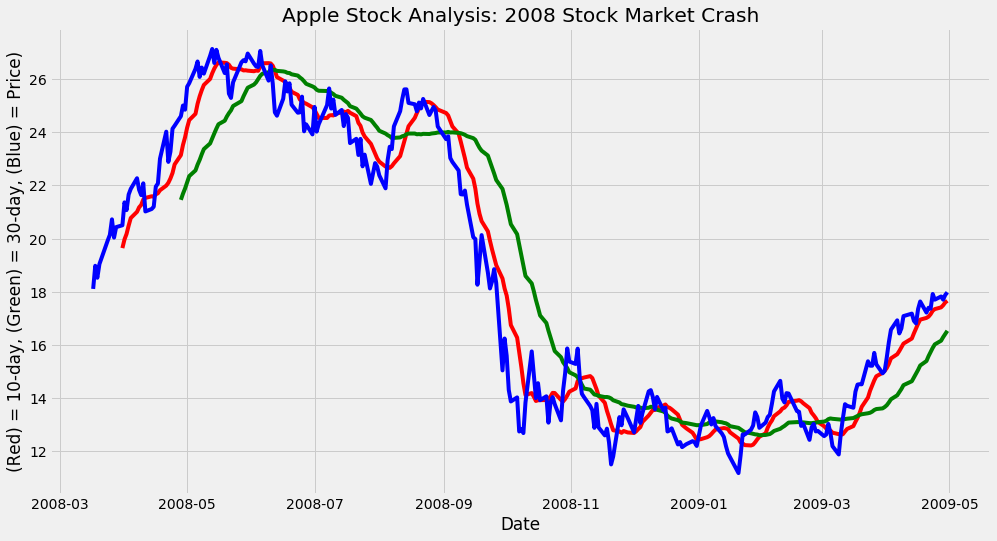

In [16]:
plt.figure(figsize=(15,8))

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("Apple Stock Analysis: 2008 Stock Market Crash")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")


In [30]:
path_2 = r'C:\Users\Mark\Desktop\project_one\Stock Prices'
all_files_xom = glob.glob(os.path.join(path_2, 'XOM.csv'))

df_from_each_file_xom = (pd.read_csv(f) for f in all_files_xom)

concatenated_df_xom = pd.concat(df_from_each_file_xom, ignore_index=True)
concatenated_df_xom.head()

,Company,Date,Open,High,Low,Close,Volume,Adj Close
0,XOM,29-Dec-17,84.000000,84.199997,83.639999,83.639999,8523400,83.639999
1,XOM,28-Dec-17,83.980003,84.050003,83.800003,84.019997,7495300,84.019997
2,XOM,27-Dec-17,83.989998,84.099998,83.739998,83.900002,7000600,83.900002
3,XOM,26-Dec-17,83.959999,84.360001,83.900002,83.980003,4777200,83.980003
4,XOM,22-Dec-17,83.879997,84.019997,83.599998,83.970001,10161400,83.970001


In [31]:
concatenated_df_xom['Date'] = pd.to_datetime(concatenated_df_xom['Date'])
concatenated_df_xom = concatenated_df_xom.sort_values(by='Date')

In [32]:
hur_kat_df_xom = concatenated_df_xom[(concatenated_df_xom['Date'] > '2005-03-01') & (concatenated_df_xom['Date'] < '2006-4-01')]
hur_kat_df_xom.head(10)

,Company,Date,Open,High,Low,Close,Volume,Adj Close
3231,XOM,2005-03-02,62.049999,63.169998,62.029999,62.680000,25974500,45.104118
3230,XOM,2005-03-03,62.700001,63.130001,62.299999,63.049999,20290900,45.370377
3229,XOM,2005-03-04,63.119999,64.010002,62.750000,63.570000,20804500,45.744560
3228,XOM,2005-03-07,63.580002,63.599998,62.580002,63.000000,19294800,45.334396
3227,XOM,2005-03-08,63.150002,63.599998,62.799999,63.099998,18192000,45.406338
3226,XOM,2005-03-09,63.099998,64.370003,60.700001,60.790001,68153700,43.744087
3225,XOM,2005-03-10,60.900002,61.040001,59.500000,60.369999,40001800,43.441864
3224,XOM,2005-03-11,60.369999,61.590000,60.169998,61.049999,24561500,43.931179
3223,XOM,2005-03-14,61.060001,61.500000,60.040001,61.279999,19564300,44.096687
3222,XOM,2005-03-15,61.290001,61.860001,60.270000,60.349998,17576600,43.427467


In [33]:
date = hur_kat_df_xom['Date'].tolist()
closep = hur_kat_df_xom['Close'].tolist()
highp = hur_kat_df_xom['High'].tolist()
lowp = hur_kat_df_xom['Low'].tolist()
openp = hur_kat_df_xom['Open'].tolist()
volume = hur_kat_df_xom['Volume'].tolist()

Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

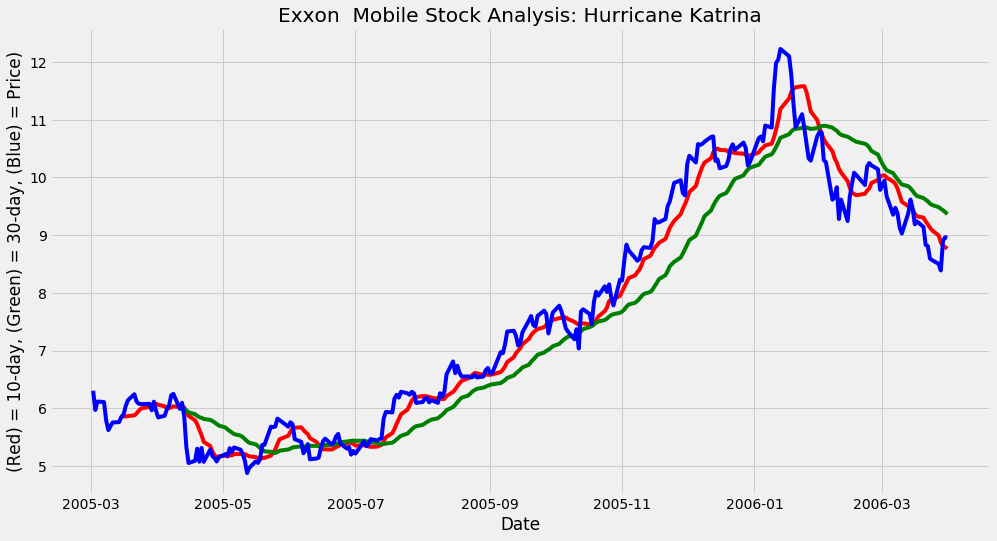

In [34]:
plt.figure(figsize=(15,8))

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("Exxon  Mobile Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")

In [35]:
closep_aapl = hur_kat_df_aapl['Close'].tolist()
closep_xom = hur_kat_df_xom['Close'].tolist()
ma3_aapl = moving_average(closep_aapl,MA3)
ma3_xom = moving_average(closep_xom,MA3)

Text(0,0.5,'(Red) = Apple, (Green) = Exxon Mobile')

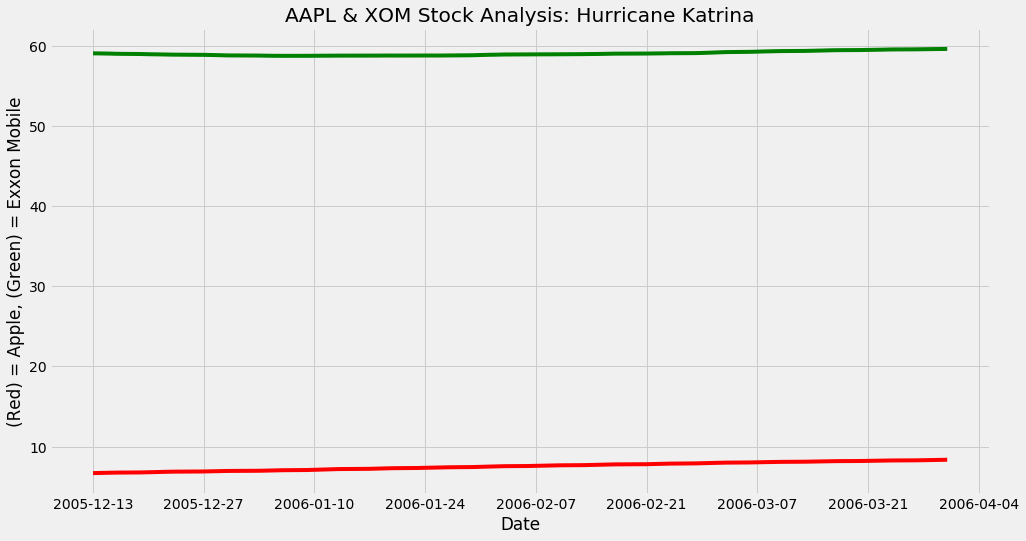

In [36]:
plt.figure(figsize=(15,8))

AAPL_MA50, = plt.plot(short_date_3, ma3_aapl, color="red", label="AAPL")
XOM_MA50, = plt.plot(short_date_3, ma3_xom, color="green", label="XOM")

plt.title("AAPL & XOM Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = Apple, (Green) = Exxon Mobile")